In [11]:
# Important Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading csv
order_data = pd.read_csv(r"C:\Users\2000132355\Downloads\Sample.Data.v3\Sample Data v3\Order_v3.csv", sep=',', encoding='latin-1')
order_data.head()

,orderIdentifier,orderType,vendor.organizationIdentifier,buyer.organizationIdentifier,shipFromInstructionLocation.locationIdentifier,shipToLocation.locationIdentifier,orderStatus,createdDate,requestedShipDate,requestedDeliveryDate,plannedShipDate,plannedDeliveryDate,quantity,quantityUnits,totalValue,orderValueCurrency,lineCount,totalShippedQuantity,exclude,sourceLink
0,100044349,OUTBOUND,LightTree,AHTD,LT-1,AHTD - Bentonville,NaN,2021-06-08T00:00:00,2021-07-20T00:00:00,2021-07-30T00:00:00,2021-07-23T00:00:00,2021-07-30T00:00:00,189,EA,236250.0,USD,3,NaN,NaN,http://lighttree.com/100044349
1,100044350,OUTBOUND,LightTree,AHTD,LT-1,AHTD - Bentonville,NaN,2021-06-08T00:00:00,2021-07-23T00:00:00,2021-07-30T00:00:00,2021-07-23T00:00:00,2021-07-30T00:00:00,20,EA,25000.0,USD,3,NaN,NaN,http://lighttree.com/100044350
2,100044353,OUTBOUND,LightTree,AHTD,LT-1,AHTD - Bentonville,NaN,2021-06-08T00:00:00,2021-07-13T00:00:00,2021-07-30T00:00:00,2021-07-23T00:00:00,2021-07-30T00:00:00,212,EA,265000.0,USD,3,NaN,NaN,http://lighttree.com/100044353
3,100055001,OUTBOUND,LightTree,AHTD,LT-2,AHTD - Bentonville,NaN,2017-07-11T00:00:00,2021-08-10T00:00:00,2021-08-18T00:00:00,2021-08-10T00:00:00,2021-08-18T00:00:00,761,EA,59473.0,USD,3,NaN,NaN,http://lighttree.com/100055001
4,100055003,OUTBOUND,LightTree,AHTD,LT-2,AHTD - Bentonville,NaN,2017-07-20T00:00:00,2021-08-11T00:00:00,2021-08-14T00:00:00,2021-08-11T00:00:00,2021-08-14T00:00:00,520,EA,47438.0,USD,3,NaN,NaN,http://lighttree.com/100055003


#### Manage Different Data Types

In [17]:
# Convert date columns to datetime
date_columns = ['createdDate', 'requestedShipDate', 'requestedDeliveryDate', 'plannedShipDate', 'plannedDeliveryDate']
for col in date_columns:
    order_data[col] = pd.to_datetime(order_data[col])
# Converting str column to int 
order_data['quantity'] = order_data['quantity'].astype(int)
print(order_data.dtypes)

orderIdentifier                                            int64
orderType                                                 object
vendor.organizationIdentifier                             object
buyer.organizationIdentifier                              object
shipFromInstructionLocation.locationIdentifier            object
shipToLocation.locationIdentifier                         object
orderStatus                                              float64
createdDate                                       datetime64[ns]
requestedShipDate                                 datetime64[ns]
requestedDeliveryDate                             datetime64[ns]
plannedShipDate                                   datetime64[ns]
plannedDeliveryDate                               datetime64[ns]
quantity                                                   int32
quantityUnits                                             object
totalValue                                               float64
orderValueCurrency       

#### Use your function for data analysis

In [18]:
def total_value_by_vendor(dataframe):
    """Calculate the total value of orders for each vendor."""
    return dataframe.groupby('vendor.organizationIdentifier')['totalValue'].sum()

# Use the function
total_value = total_value_by_vendor(order_data)
print(total_value.head())

def key_metrics(order_data):
    # Calculate some key metrics
    total_orders = order_data.shape[0]
    total_quantity_shipped = order_data['quantity'].sum()
    total_revenue = order_data['totalValue'].sum()
    average_order_value = total_revenue / total_orders if total_orders > 0 else 0
    return total_orders, total_quantity_shipped, total_revenue, average_order_value

total_orders, total_quantity_shipped, total_revenue, average_order_value = key_metrics(order_data)
print(f"\nTotal Orders: {total_orders}")
print(f"Total Quantity Shipped: {total_quantity_shipped}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")


vendor.organizationIdentifier
Alumi-lux     716625.0
Amos           86625.0
Brewers      2123017.0
EM             29925.0
F & M         738150.0
Name: totalValue, dtype: float64

Total Orders: 214
Total Quantity Shipped: 59513
Total Revenue: $26,311,213.00
Average Order Value: $122,949.59


In [19]:
# Check for missing values
print("\nMissing Values:")
print(order_data.isnull().sum())

# Fill missing values
order_data['orderStatus'].fillna('Unknown', inplace=True)
order_data['totalShippedQuantity'].fillna(0, inplace=True)


Missing Values:
orderIdentifier                                     0
orderType                                           0
vendor.organizationIdentifier                       0
buyer.organizationIdentifier                        0
shipFromInstructionLocation.locationIdentifier      0
shipToLocation.locationIdentifier                   0
orderStatus                                       214
createdDate                                         0
requestedShipDate                                   0
requestedDeliveryDate                               0
plannedShipDate                                     4
plannedDeliveryDate                                21
quantity                                            0
quantityUnits                                       0
totalValue                                          0
orderValueCurrency                                  0
lineCount                                           0
totalShippedQuantity                              214
exclude    

#### Visualize Data

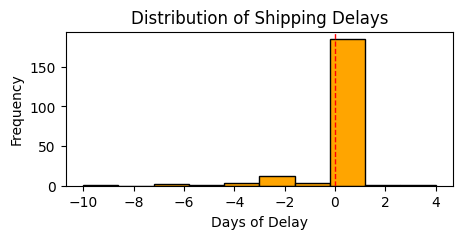

In [39]:
# Calculate delays in shipping
order_data['shipping_delay'] = (order_data['requestedShipDate'] - order_data['plannedShipDate']).dt.days

# Visualize shipping delays
plt.figure(figsize=(5, 2))
plt.hist(order_data['shipping_delay'].dropna(), bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Shipping Delays')
plt.xlabel('Days of Delay')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.show()


#### Wrangle Data

In [51]:
def categorize_order_value(value):
    """Categorize orders based on total value."""
    if value > 200000:
        return 'High Value'
    elif value > 50000:
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply the function to create a new column
order_data['Value_Category'] = order_data['totalValue'].apply(categorize_order_value)
print('Categorizeds Data\n', order_data[['shipToLocation.locationIdentifier', 'totalValue', 'Value_Category']].sample(5))

Categorizeds Data
     shipToLocation.locationIdentifier  totalValue Value_Category
131                              LT-2    316800.0     High Value
81                               LT-1    232960.0     High Value
63                               LT-1     97280.0   Medium Value
172                              LT-2    131840.0   Medium Value
204              NYDOT - New Rochelle     46250.0      Low Value
